In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_scala(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="scala",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/scala_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (SCALA, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (SCALA, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_scala(save_directory="./", split="train")

README.md:   0%|          | 0.00/3.39k [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/353M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/353M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/352M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/353M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/10 shards):   0%|          | 0/1355788 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (SCALA, train) successfully downloaded and saved to './/scala_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./scala_train_dataset")

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 1355788
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'src/main/scala/com/wavesplatform/Explorer.scala', 'max_stars_repo_name': 'raisex/g4', 'max_stars_count': 0, 'id': '0', 'content': 'package com.wavesplatform\n\nimport java.io.File\nimport java.nio.ByteBuffer\nimport java.util\n\nimport com.typesafe.config.ConfigFactory\nimport com.wavesplatform.database.{Keys, LevelDBWriter}\nimport com.wavesplatform.db.openDB\nimport com.wavesplatform.settings.{WavesSettings, loadConfig}\nimport com.wavesplatform.state.{ByteStr, EitherExt2}\nimport com.wavesplatform.utils.{Base58, Base64}\nimport org.slf4j.bridge.SLF4JBridgeHandler\nimport scorex.account.{Address, AddressScheme}\nimport scorex.utils.ScorexLogging\n\nimport scala.collection.JavaConverters._\nimport scala.util.Try\n\nobject Explorer extends ScorexLogging {\n  case class Stats(entryCount: Long, totalKeySize: Long, totalValueSize: Long)\n\n  private val keys = Array(\n    "version",\n    "height",\n    "score",\n    "block-at-height",\n    "height-of",\n    "waves

In [7]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
package com.wavesplatform

import java.io.File
import java.nio.ByteBuffer
import java.util

import com.typesafe.config.ConfigFactory
import com.wavesplatform.database.{Keys, LevelDBWriter}
import com.wavesplatform.db.openDB
import com.wavesplatform.settings.{WavesSettings, loadConfig}
import com.wavesplatform.state.{ByteStr, EitherExt2}
import com.wavesplatform.utils.{Base58, Base64}
import org.slf4j.bridge.SLF4JBridgeHandler
import scorex.account.{Address, AddressScheme}
import scorex.utils.ScorexLogging

import scala.collection.JavaConverters._
import scala.util.Try

object Explorer extends ScorexLogging {
  case class Stats(entryCount: Long, totalKeySize: Long, totalValueSize: Long)

  private val keys = Array(
    "version",
    "height",
    "score",
    "block-at-height",
    "height-of",
    "waves-balance-history",
    "waves-balance",
    "assets-for-address",
    "asset-balance-history",
    "asset-balance",
    "asset-info-history",
    "asset-info",
    "lease-ba

In [8]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/1355788 [00:00<?, ? examples/s]

Example 0:
package com.wavesplatform

import java.io.File
import java.nio.ByteBuffer
import java.util

import com.typesafe.config.ConfigFactory
import com.wavesplatform.database.{Keys, LevelDBWriter}
import com.wavesplatform.db.openDB
import com.wavesplatform.settings.{WavesSettings, loadConfig}
import com.wavesplatform.state.{ByteStr, EitherExt2}
import com.wavesplatform.utils.{Base58, Base64}
import org.slf4j.bridge.SLF4JBridgeHandler
import scorex.account.{Address, AddressScheme}
import scorex.utils.ScorexLogging

import scala.collection.JavaConverters._
import scala.util.Try

object Explorer extends ScorexLogging {
  case class Stats(entryCount: Long, totalKeySize: Long, totalValueSize: Long)

  private val keys = Array(
    "version",
    "height",
    "score",
    "block-at-height",
    "height-of",
    "waves-balance-history",
    "waves-balance",
    "assets-for-address",
    "asset-balance-history",
    "asset-balance",
    "asset-info-history",
    "asset-info",
    "lease-ba

In [9]:
import pandas as pd

df = pd.DataFrame(dataset)

In [10]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    1.355788e+06
mean     3.192329e+01
std      8.714524e+00
min      1.800000e+00
25%      2.648315e+01
50%      3.167347e+01
75%      3.679892e+01
max      9.904051e+01
Name: avg_line_length, dtype: float64


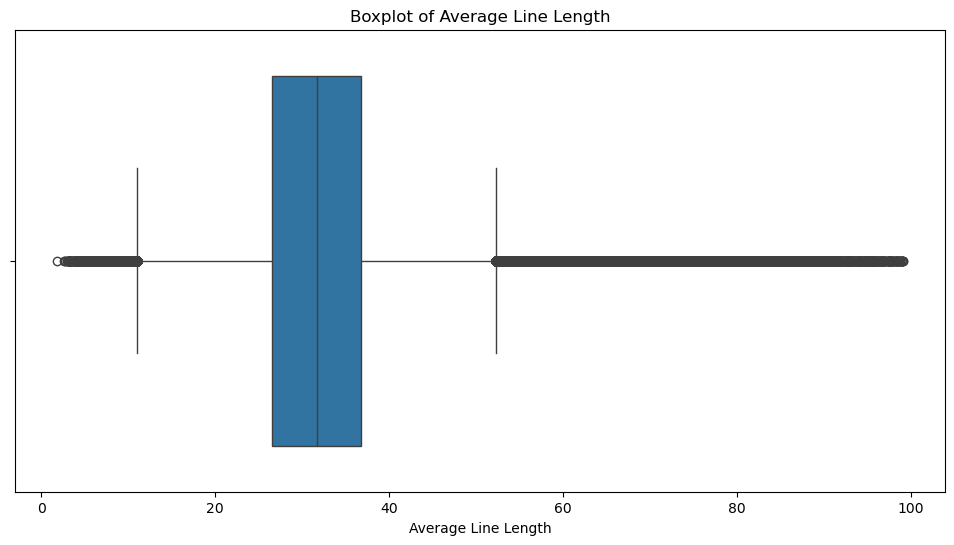

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [12]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [13]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 32882


In [14]:
outliers['avg_line_length'].describe()

count    32882.000000
mean        49.570592
std         21.817582
min          1.800000
25%         52.675676
50%         55.500000
75%         60.736746
max         99.040512
Name: avg_line_length, dtype: float64

In [15]:
df.drop(outliers.index, inplace=True)

In [16]:
df['avg_line_length'].describe()

count    1.322906e+06
mean     3.148466e+01
std      7.620113e+00
min      1.102042e+01
25%      2.645455e+01
50%      3.153846e+01
75%      3.647417e+01
max      5.227132e+01
Name: avg_line_length, dtype: float64

In [37]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

37.74545454545454

In [18]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    1.322906e+06
mean     9.489140e+01
std      2.054064e+02
min      1.000000e+00
25%      2.600000e+01
50%      5.100000e+01
75%      1.010000e+02
max      2.813500e+04
Name: line_count, dtype: float64

In [19]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [20]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 990882
Number of examples with line count in range 101-200: 202179
Number of examples with line count in range 201-300: 62702
Number of examples with line count in range 301-400: 27040
Number of examples with line count in range 401-500: 13834
Number of examples with line count in range 501-600: 8010
Number of examples with line count in range 601-700: 4892
Number of examples with line count in range 701-800: 3186
Number of examples with line count in range 801-900: 2246
Number of examples with line count in range 901-1000: 1616
Number of examples with line count in range 1000+: 6319


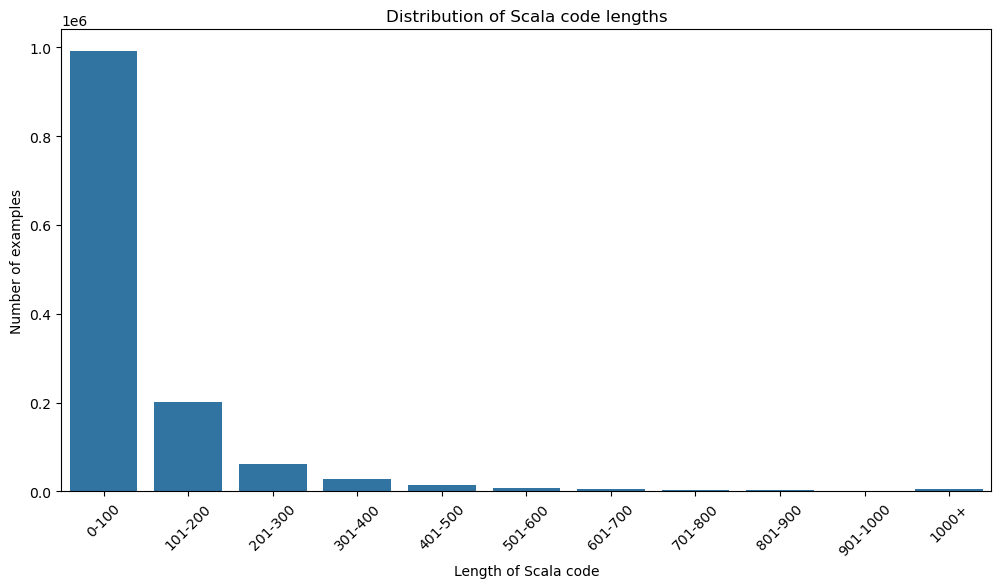

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of Scala code lengths")
plt.xlabel("Length of Scala code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,990882,990882,74.901920,74.901920
1,101-200,202179,1193061,15.282945,90.184866
2,201-300,62702,1255763,4.739717,94.924583
3,301-400,27040,1282803,2.043985,96.968568
4,401-500,13834,1296637,1.045728,98.014296
5,501-600,8010,1304647,0.605485,98.619781
6,601-700,4892,1309539,0.369792,98.989573
7,701-800,3186,1312725,0.240833,99.230406
8,801-900,2246,1314971,0.169778,99.400184
9,901-1000,1616,1316587,0.122155,99.522339


In [26]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [38]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,package com.wavesplatform\n\nimport java.io.Fi...,36.009662,207
1,package helpers\n\nimport org.specs2.mutable._...,31.782828,198
2,/*********************************************...,35.455357,224
3,package cqrs.queries\n\nimport java.time.Insta...,28.333333,30
4,"/*\nCopyright 2012 Twitter, Inc.\n\nLicensed u...",31.710526,38


In [39]:
df_filtered.shape

(1322906, 3)

In [40]:
df_filtered = df_filtered[df_filtered['line_count'] <= 200]
df_filtered.shape

(1193061, 3)

In [41]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 37]
df_filtered.shape

(945655, 3)

In [42]:
df_filtered.head()

,content,avg_line_length,line_count
1,package helpers\n\nimport org.specs2.mutable._...,31.782828,198
3,package cqrs.queries\n\nimport java.time.Insta...,28.333333,30
4,"/*\nCopyright 2012 Twitter, Inc.\n\nLicensed u...",31.710526,38
8,package is.hail.utils.richUtils\n\nimport is.h...,29.605634,142
10,<filename>scala-koans/src/test/scala/org/funct...,31.607143,56


In [43]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     1.322906e+06  1.322906e+06
mean      3.148466e+01  9.489140e+01
std       7.620113e+00  2.054064e+02
min       1.102042e+01  1.000000e+00
25%       2.645455e+01  2.600000e+01
50%       3.153846e+01  5.100000e+01
75%       3.647417e+01  1.010000e+02
max       5.227132e+01  2.813500e+04

       avg_line_length     line_count
count    945655.000000  945655.000000
mean         28.240522      53.911314
std           5.699576      42.669056
min          11.025000       1.000000
25%          24.551724      22.000000
50%          29.102941      41.000000
75%          32.760870      73.000000
max          37.000000     200.000000


In [44]:
data_dict_scala = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_scala[f"scala_{i}"] = example

In [45]:
assert len(data_dict_scala) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [46]:
for i, (k,v) in enumerate(data_dict_scala.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example scala_0:
package helpers

import org.specs2.mutable._
import com.ruimo.recoeng.RecoEngApi
import com.ruimo.recoeng.json.{JsonResponseHeader, OnSalesJsonResponse, SalesItem, TransactionMode, TransactionSalesMode, SortOrder, JsonRequestPaging, Desc, Asc, ScoredItem}
import com.ruimo.recoeng.json.RecommendByItemJsonResponse
import play.api.libs.json.{JsSuccess, JsResult}
import models.LoginSession
import org.mockito.Mockito.mock
import models.PersistedTransaction
import models.TransactionLogItem
import models.TransactionLogCoupon
import models.TransactionLogHeader
import models.TransactionType
import models.Address
import models.ItemName
import helpers.Helper._
import com.ruimo.scoins.Scoping._

class RecommendEngineSpec extends Specification {
  "Recommend engine" should {
    "Can send transaction" in {
      val api: RecoEngApi = new RecoEngApi {
        def onSales(
          requestTime: Long,
          sequenceNumber: Long,
          transactionMode: TransactionMode,
       

In [47]:
import json

with open('scala_train.json', 'w') as f:
    json.dump(data_dict_scala, f)
    print("Saved to 'scala_train.json'")

Saved to 'scala_train.json'
